# Tutorial: HDF5 headers
This tutorial will show you how to estimate the shape and sizes of beams from the LOFAR telescope.

First, let's load the python libraries that we will use.

In [16]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import h5py
import glob
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


HDF5 files store both data as well as the associated metadata in groups. The image below gives a overview of the HDF5 file structure.
![title](img/hdf5_structure4.jpg)

Beamformed LOFAR data uses this structure, where the formatting of the HDF5 file name in sub-array pointing, beam, and Stokes parameter, is represented in the file.

The following commands show the group structure of a LOFAR HDF5 file.

In [19]:
os.chdir("../../data/L629252")
h5 = h5py.File("L629252_SAP000_B000_S0_P000_bf.h5", "r")

In [20]:
def print_name(name):
    print(name)

In [21]:
h5.visit(print_name)

SUB_ARRAY_POINTING_000
SUB_ARRAY_POINTING_000/BEAM_000
SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES
SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES/COORDINATE_0
SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES/COORDINATE_1
SUB_ARRAY_POINTING_000/BEAM_000/PROCESS_HISTORY
SUB_ARRAY_POINTING_000/BEAM_000/STOKES_0
SUB_ARRAY_POINTING_000/PROCESS_HISTORY
SYS_LOG


You will recognize the `SUB_ARRAY_POINTING_000/BEAM_000/STOKES_0` grouping. Each of these groups and subgroups has a list of *attributes*, which hold metadata. The following command shows the attributes of the `root` ("/") group.

In [22]:
group = h5["/"]
keys = sorted(["%s"%item for item in sorted(list(group.attrs))])
for key in keys:
    print(key + " = " + str(group.attrs[key]))

ANTENNA_SET = HBA_DUAL
BANDWIDTH = 94.921875
BANDWIDTH_UNIT = MHz
BF_FORMAT = TAB
BF_VERSION = Cobalt/OutputProc 3.0_0 r38668 using DAL 2.5.0 and HDF5 1.8.12
CLOCK_FREQUENCY = 200.0
CLOCK_FREQUENCY_UNIT = MHz
CREATE_OFFLINE_ONLINE = Online
DOC_NAME = ICD 3: Beam-Formed Data
DOC_VERSION = 2.5.0
FILEDATE = 2017-11-22T14:57:57.0
FILENAME = L629252_SAP000_B000_S0_P000_bf.h5
FILETYPE = bf
FILTER_SELECTION = HBA_110_190
GROUPTYPE = Root
NOF_SUB_ARRAY_POINTINGS = 1
NOTES = 
OBSERVATION_END_MJD = 58079.665968975285
OBSERVATION_END_UTC = 2017-11-22T15:58:59.719465017Z
OBSERVATION_FREQUENCY_CENTER = 135.2508544921875
OBSERVATION_FREQUENCY_MAX = 151.07421875
OBSERVATION_FREQUENCY_MIN = 119.427490234375
OBSERVATION_FREQUENCY_UNIT = MHz
OBSERVATION_ID = 629252
OBSERVATION_NOF_BITS_PER_SAMPLE = 8
OBSERVATION_NOF_STATIONS = 12
OBSERVATION_NOF_SUB_ARRAY_POINTINGS = 3
OBSERVATION_START_MJD = 58079.62430555555
OBSERVATION_START_UTC = 2017-11-22T14:59:00.000000000Z
OBSERVATION_STATIONS_LIST = ['CS002HBA0

## Exercise 1
Have a look at the attributes of the other subgroups in the file. In particular try to find the attributes which describe;
1. The number of sub-array pointings in this observation,
2. The number of tied-array beams within a sub-array,
3. The total bandwidth,
4. The integration time,
5. Which Stokes parameter is contained in this file.

Use the `.attrs["<keyword>"]` function to obtain the values of these parameters.

In [23]:
nsap = h5["/"].attrs["OBSERVATION_NOF_SUB_ARRAY_POINTINGS"]
nbeam = h5["/SUB_ARRAY_POINTING_000"].attrs["OBSERVATION_NOF_BEAMS"]
tint = h5["/"].attrs["TOTAL_INTEGRATION_TIME"]
stokes = h5["/SUB_ARRAY_POINTING_000/BEAM_000/STOKES_0"].attrs["STOKES_COMPONENT"]
tsamp = h5["/SUB_ARRAY_POINTING_000/BEAM_000"].attrs["SAMPLING_TIME"]
print(nsap, nbeam, tsamp, tint, stokes)

3 74 0.0004915200000000001 3599.7194649600006 I


The sub-array pointing group provides the pointing right ascension and declination as `POINT_RA` and `POINT_DEC`, as well as keywords describing their units. Let's first the pointing right ascension and declination of all the sub-array pointings in this observation.

We can use `glob` to create a list with HDF5 headers of the first beam (`B000`) of each sub-array pointing.

In [25]:
sapfnames = sorted(glob.glob("L629252_SAP???_B000_S0_P000_bf.h5"))

The following piece of code loops over these files to obtain the sub-array pointing identifiers, and then obtains the pointing right ascension and declination of each.

In [26]:
sap_ra = []
sap_dec = []
for sapfname in sapfnames:
    h5 = h5py.File(sapfname, "r")
    sap_ids = [key for key in h5.keys() if "SUB_ARRAY_POINTING" in key]
    for sap_id in sap_ids:
        sap_ra.append(h5[sap_id].attrs['POINT_RA'])
        sap_dec.append(h5[sap_id].attrs['POINT_DEC'])

We can now plot these pointings.

Text(0.5, 1.0, 'L629252 sub-array pointings')

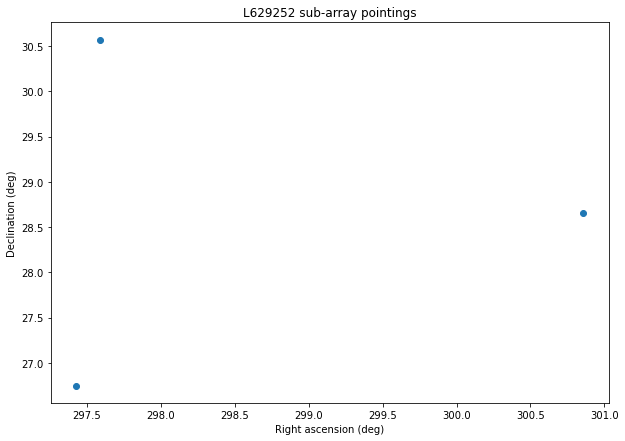

In [29]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(sap_ra, sap_dec, 'o')
ax.set_xlabel("Right ascension (deg)")
ax.set_ylabel("Declination (deg)")
ax.set_title("L629252 sub-array pointings")

## Exercise 2
Use the code from the previous cells as an example to obtain the pointing right ascension and declination of each beam in each of the three sub-array pointings. Make a plot of all the beam pointings and sub-array pointings.

In [31]:
beamfnames = sorted(glob.glob("L629252_SAP???_B???_S0_P000_bf.h5"))

In [32]:
beam_ra = []
beam_dec = []
sap_no = []
for beamfname in beamfnames:
    h5 = h5py.File(beamfname, "r")
    sap_ids = [key for key in h5.keys() if "SUB_ARRAY_POINTING" in key]
    for sap_id in sap_ids:
        beam_ids = [key for key in h5[sap_id].keys() if "BEAM" in key]
        for beam_id in beam_ids:
            group_name = sap_id + "/" + beam_id
            beam_ra.append(h5[group_name].attrs['POINT_RA'])
            beam_dec.append(h5[group_name].attrs['POINT_DEC'])

Text(0.5, 1.0, 'L629252 Tied-array pointings')

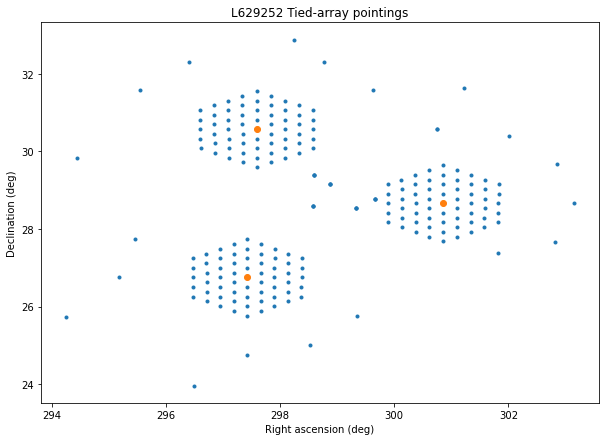

In [33]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(beam_ra, beam_dec, '.')
ax.plot(sap_ra, sap_dec, 'o')
ax.set_xlabel("Right ascension (deg)")
ax.set_ylabel("Declination (deg)")
ax.set_title("L629252 Tied-array pointings")

## Exercise 3
You will have noticed the `COORDINATES` sub-group of the beam group. Investigate this group and the groups contained within them.
1. What are the dimensions and units of the two coordinate axes?
2. Compare the setup of the two coordinate axis. How does their setup differ?
3. Extract the frequencies of the channels and show that these match the channel width defined in the beam sub-group.

In [34]:
h5 = h5py.File("L629252_SAP000_B000_S0_P000_bf.h5", "r")
group = h5["/SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES"]
coord = h5["/SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES/COORDINATE_0"]
print("Coordinate 0:", coord.attrs["AXIS_NAMES"][0], coord.attrs["AXIS_UNITS"][0])
coord = h5["/SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES/COORDINATE_1"]
print("Coordinate 1:", coord.attrs["AXIS_NAMES"][0], coord.attrs["AXIS_UNITS"][0])

Coordinate 0: Time us
Coordinate 1: Frequency Hz


The time index uses an increment per pixel, while the frequency index provides an array of values.

In [35]:
freqs = h5["/SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES/COORDINATE_1"].attrs["AXIS_VALUES_WORLD"]

In [36]:
dfreq = freqs[1:]-freqs[:-1]
print(dfreq)

[12207.03125 12207.03125 12207.03125 ... 12207.03125 12207.03125
 12207.03125]
